In [1]:

import pyautogui
import time
import webbrowser
import pandas as pd
import bs4
import pyperclip
import numpy as np
import os
import re
import math
from datetime import datetime, timedelta
from collections import Counter

from urllib.parse import urlparse
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes


In [2]:
df_venture = pd.read_csv('../Data/ico_manully2.csv')
df_venture

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,...,code_available,social_media,is_Ethereum,expert,is_hardcap,is_softcap,is_investor,after18,twitter,is_twitter
0,0,0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,...,False,8,False,0,True,True,False,True,https://twitter.com/artyfact_game,True
1,1,1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,...,False,6,NaN,[1602],True,False,True,True,https://twitter.com/SupraOracles?s=20,True
2,2,2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,...,False,7,NaN,0,True,False,False,True,https://twitter.com/Islamic_coin,True
3,3,3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,...,True,5,NaN,[708],True,True,True,True,NaN,False
4,4,4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,...,False,7,False,0,True,False,False,True,https://twitter.com/ScapesMania,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,...,True,8,True,0,True,False,False,False,https://twitter.com/wavesprotocol,True
790,790,790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,...,True,10,True,0,False,False,False,False,https://twitter.com/wetrustplatform,True
791,791,791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,...,False,5,False,0,False,False,False,False,NaN,False
792,792,792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,...,False,5,True,0,False,False,False,False,NaN,False


In [3]:
def date_clean(date_str):
     date_str = str(date_str)
     if len(date_str) == 0:
        return None
     try:
          
          return datetime.strptime(date_str, "%Y-%m-%d")
     except ValueError:
          
          return None
     
df_venture['ICO End'] = df_venture['ICO End'].apply(date_clean)
df_venture['ICO Start'] = df_venture['ICO Start'].apply(date_clean)
df_venture

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Project,Abbr,Link,Sale Price,ROI,Total Raise,Launchpad,...,code_available,social_media,is_Ethereum,expert,is_hardcap,is_softcap,is_investor,after18,twitter,is_twitter
0,0,0,0,Artyfact,ARTY,https://cryptorank.io/ico/artyfact,0.300,NaN,2450000.0,TruePNL,...,False,8,False,0,True,True,False,True,https://twitter.com/artyfact_game,True
1,1,1,1,SupraOracles,SUPRA,https://cryptorank.io/ico/supra-oracles,0.048,NaN,2400000.0,NaN,...,False,6,NaN,[1602],True,False,True,True,https://twitter.com/SupraOracles?s=20,True
2,2,2,2,Islamic Coin,ISLM,https://cryptorank.io/ico/islamic-coin,0.300,0.60,2400000.0,Republic,...,False,7,NaN,0,True,False,False,True,https://twitter.com/Islamic_coin,True
3,3,3,3,Archway,ARCH,https://cryptorank.io/ico/archway,0.200,0.38,6030000.0,Coinlist+1,...,True,5,NaN,[708],True,True,True,True,NaN,False
4,4,4,4,ScapesMania,$MANIA,https://cryptorank.io/ico/scapesmania,0.009,NaN,5870000.0,NaN,...,False,7,False,0,True,False,False,True,https://twitter.com/ScapesMania,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,789,789,Waves,WAVES,https://cryptorank.io/ico/waves,0.188,12.01,16000000.0,NaN,...,True,8,True,0,True,False,False,False,https://twitter.com/wavesprotocol,True
790,790,790,790,WeTrust,TRST,https://cryptorank.io/ico/trust,0.060,0.01,NaN,NaN,...,True,10,True,0,False,False,False,False,https://twitter.com/wetrustplatform,True
791,791,791,791,ZenGold,ZENGOLD,https://cryptorank.io/ico/zengold,3.860,NaN,NaN,NaN,...,False,5,False,0,False,False,False,False,NaN,False
792,792,792,792,Zipper,ZIP,https://cryptorank.io/ico/zip,0.030,0.00,NaN,NaN,...,False,5,True,0,False,False,False,False,NaN,False


In [4]:
# basic information

df_venture['ICO Days'] = df_venture['ICO End']-df_venture['ICO Start']+ timedelta(days=1)
col_name = df_venture.columns.tolist()[1:]
for c in col_name:
     n = sum(~df_venture[c].isnull())
     print(f"Label:{c},number:#{n}")


Label:Unnamed: 0.1,number:#794
Label:Unnamed: 0,number:#794
Label:Project,number:#794
Label:Abbr,number:#794
Label:Link,number:#794
Label:Sale Price,number:#781
Label:ROI,number:#748
Label:Total Raise,number:#581
Label:Launchpad,number:#104
Label:Ended,number:#599
Label:When,number:#599
Label:Funds,number:#257
Label:Type,number:#794
Label:Raise,number:#571
Label:Initial Cap,number:#119
Label:Market Cap,number:#707
Label:Blockchain,number:#674
Label:Category,number:#544
Label:Listing Date,number:#761
Label:ATH ROI,number:#748
Label:ICO Days,number:#715
Label:Rounds,number:#794
Label:ICO Order,number:#794
Label:Social,number:#794
Label:Funds and Investors,number:#257
Label:Investor Count,number:#794
Label:ICO Start,number:#715
Label:ICO End,number:#715
Label:Soft Cap,number:#24
Label:Hard Cap,number:#547
Label:ICO Raised,number:#794
Label:Other Link,number:#2
Label:Success,number:#794
Label:github,number:#479
Label:code_available,number:#794
Label:social_media,number:#794
Label:is_Ethere

     year   No  Yes
0  2014.0    0    1
1  2015.0    1    2
2  2016.0    3    4
3  2017.0  163   64
4  2018.0  255   58
5  2019.0   15   11
6  2020.0   11   30
7  2021.0    5   53
8  2022.0    6   23
9  2023.0    3    7


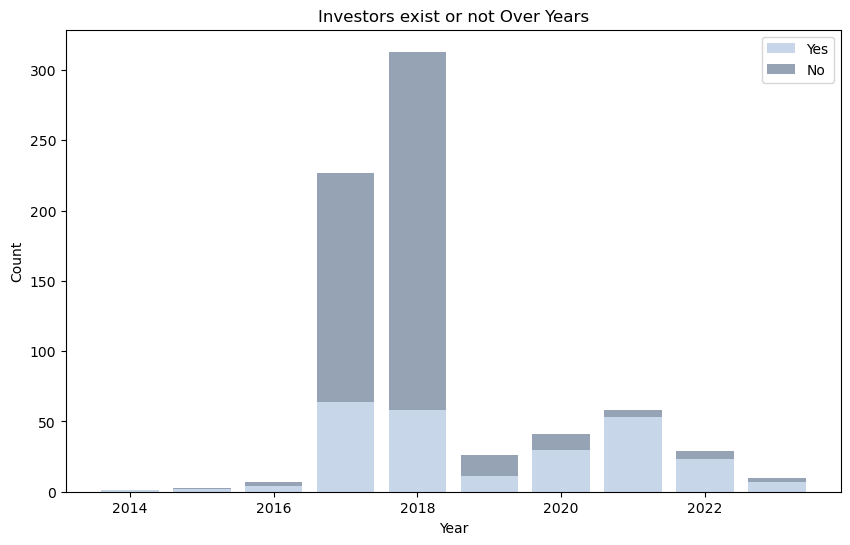

In [8]:
df_1 = df_venture.loc[:,['ICO Start', 'is_investor']]
df_1['year'] = df_1['ICO Start'].apply(lambda x: x.year)

# Group by year and success, then count the occurrences
grouped_df = df_1.groupby(['year', 'is_investor']).size().unstack(fill_value=0)

# Rename the columns for clarity
grouped_df.columns = ['No', 'Yes']

# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()

# Display the result
print(grouped_df)

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(grouped_df['year'], grouped_df['Yes'], label='Yes', color='#B0C6E1', alpha=0.7)#DDEAF7
plt.bar(grouped_df['year'], grouped_df['No'], bottom=grouped_df['Yes'], label='No', color='#687C94', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Investors exist or not Over Years')
plt.legend()
plt.show()


     year   No  Yes  Total  Yes Proportion  No Proportion
0  2014.0    0    1      1        1.000000       0.000000
1  2015.0    1    2      3        0.666667       0.333333
2  2016.0    3    4      7        0.571429       0.428571
3  2017.0  163   64    227        0.281938       0.718062
4  2018.0  255   58    313        0.185304       0.814696
5  2019.0   15   11     26        0.423077       0.576923
6  2020.0   11   30     41        0.731707       0.268293
7  2021.0    5   53     58        0.913793       0.086207
8  2022.0    6   23     29        0.793103       0.206897
9  2023.0    3    7     10        0.700000       0.300000


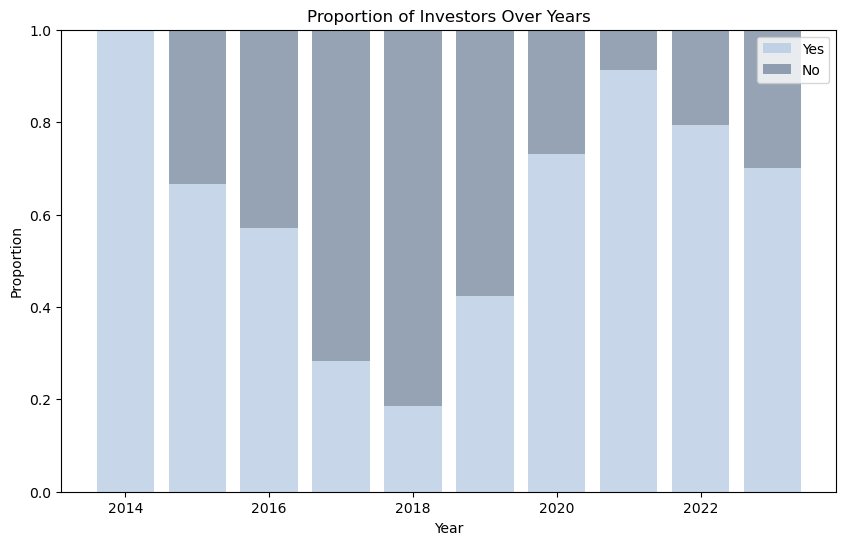

In [7]:
df_1 = df_venture.loc[:,['ICO Start', 'is_investor']]
df_1['year'] = df_1['ICO Start'].apply(lambda x: x.year)

# Group by year and success, then count the occurrences
grouped_df = df_1.groupby(['year', 'is_investor']).size().unstack(fill_value=0)

# Rename the columns for clarity
grouped_df.columns = ['No', 'Yes']

# Calculate the proportions (Yes and No) for each year
grouped_df['Total'] = grouped_df['No'] + grouped_df['Yes']
grouped_df['Yes Proportion'] = grouped_df['Yes'] / grouped_df['Total']
grouped_df['No Proportion'] = grouped_df['No'] / grouped_df['Total']

# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()

# Display the result
print(grouped_df)

# Plot the data
plt.figure(figsize=(10, 6))

plt.bar(grouped_df['year'], grouped_df['Yes Proportion'], label='Yes', color='#B0C6E1', alpha=0.7)
plt.bar(grouped_df['year'], grouped_df['No Proportion'], bottom=grouped_df['Yes Proportion'], label='No', color='#687C94', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportion of Investors Over Years')
plt.legend()
plt.show()

## Model Regression

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [14]:
#df_venture['is_Ethereum'] = df_venture['is_Ethereum'].fillna(False)
df_regression =df_venture.loc[:,['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','Category','is_softcap','Soft Cap','is_hardcap','Hard Cap',
           'Sale Price','after18','is_Ethereum','ICO Days','ICO Raised','ATH ROI']]
df_regression['is_tradable'] = ~df_regression['ATH ROI'].isnull()
df_regression['blockchain_tech'] = (df_regression['Category']=='Blockchain Infrastructure')|(df_regression['Category']=='Chain')
df_regression['service_finance'] = (df_regression['Category']=='Blockchain Service')|(df_regression['Category']=='CeFi')|(df_regression['Category']=='DeFi')
df_regression['digital_assets'] = (df_regression['Category']=='Currency')|(df_regression['Category']=='NFT')
df_regression['application'] = (df_regression['Category']=='GameFi')|(df_regression['Category']=='Social')

df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Success          794 non-null    bool           
 1   code_available   794 non-null    bool           
 2   is_twitter       794 non-null    bool           
 3   is_investor      794 non-null    bool           
 4   Investor Count   794 non-null    int64          
 5   ICO Order        794 non-null    int64          
 6   Category         544 non-null    object         
 7   is_softcap       794 non-null    bool           
 8   Soft Cap         24 non-null     float64        
 9   is_hardcap       794 non-null    bool           
 10  Hard Cap         547 non-null    float64        
 11  Sale Price       781 non-null    float64        
 12  after18          794 non-null    bool           
 13  is_Ethereum      674 non-null    object         
 14  ICO Days         715 non-n

In [9]:
def get_model_df(lst):
     df = df_regression[lst]
     for column in lst:
          df = df.loc[~df[column].isna(),]
     return df


In [134]:
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum','ICO Days','ICO Raised',
           'Sale Price','after18','is_tradable', 'blockchain_tech',
       'service_finance', 'digital_assets','application']
df_model9 = df_regression.loc[:,var_list]
df_model9['Before2019'] = ~df_model9['after18']
df_model9['After2018'] = df_model9['after18']



df_model9['sale_price_log'] = df_model9['Sale Price'].apply(lambda x:np.log(x+1))
df_model9['raised_log'] = df_model9['ICO Raised'].apply(lambda x:np.log(x+1))
df_model9['ICO Days'] = df_model9['ICO Days'].dt.days

dataset = df_model9.loc[:,['Success','raised_log','code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','After2018','is_Ethereum','ICO Days','sale_price_log', 'blockchain_tech',
       'service_finance', 'digital_assets','application']]

print(dataset.info())
        
        


numeric_columns = dataset

# 统计非零个数
count = numeric_columns.count()

# 计算均值
mean_values = numeric_columns.mean()

# 计算标准差
std_deviation = numeric_columns.std()

# 计算最小值
min_values = numeric_columns.min().astype(int)

# 计算最大值
max_values = numeric_columns.max().astype(int)


# 计算中位数
median_values = numeric_columns.median()

# 将结果组合成一个新的DataFrame
summary_df = pd.DataFrame({
    'Count': count,
    'Mean': mean_values,
    'Std Deviation': std_deviation,
    'Min': min_values,
    'Max': max_values,
    'Median': median_values
})

# 打印或保存摘要
print(summary_df)

dataset.corr().round(2)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Success          794 non-null    bool   
 1   raised_log       794 non-null    float64
 2   code_available   794 non-null    bool   
 3   is_twitter       794 non-null    bool   
 4   is_tradable      794 non-null    bool   
 5   is_investor      794 non-null    bool   
 6   is_hardcap       794 non-null    bool   
 7   After2018        794 non-null    bool   
 8   is_Ethereum      674 non-null    object 
 9   ICO Days         715 non-null    float64
 10  sale_price_log   781 non-null    float64
 11  blockchain_tech  794 non-null    bool   
 12  service_finance  794 non-null    bool   
 13  digital_assets   794 non-null    bool   
 14  application      794 non-null    bool   
dtypes: bool(11), float64(3), object(1)
memory usage: 33.5+ KB
None
                 Count       Mean Std Deviati

,Success,raised_log,code_available,is_twitter,is_tradable,is_investor,is_hardcap,After2018,is_Ethereum,ICO Days,sale_price_log,blockchain_tech,service_finance,digital_assets,application
Success,1.00,0.98,0.10,0.19,0.10,0.31,0.82,0.23,-0.14,-0.25,-0.01,0.17,0.24,-0.10,-0.00
raised_log,0.98,1.00,0.13,0.20,0.10,0.29,0.80,0.16,-0.11,-0.21,0.01,0.19,0.22,-0.10,-0.02
code_available,0.10,0.13,1.00,0.25,0.14,-0.07,0.08,-0.18,0.09,-0.03,-0.04,0.08,0.02,-0.07,-0.08
is_twitter,0.19,0.20,0.25,1.00,0.04,0.08,0.15,0.03,0.01,-0.07,-0.03,0.18,0.01,-0.11,-0.03
is_tradable,0.10,0.10,0.14,0.04,1.00,0.04,0.04,-0.13,0.05,-0.03,0.02,0.07,0.03,0.05,-0.09
is_investor,0.31,0.29,-0.07,0.08,0.04,1.00,0.32,0.47,-0.28,-0.19,0.04,0.20,0.24,-0.07,0.02
is_hardcap,0.82,0.80,0.08,0.15,0.04,0.32,1.00,0.24,-0.16,-0.22,-0.02,0.14,0.25,-0.09,-0.01
After2018,0.23,0.16,-0.18,0.03,-0.13,0.47,0.24,1.00,-0.30,-0.12,0.05,0.10,0.18,-0.01,0.04
is_Ethereum,-0.14,-0.11,0.09,0.01,0.05,-0.28,-0.16,-0.30,1.00,0.07,-0.01,-0.15,-0.10,0.02,-0.01
ICO Days,-0.25,-0.21,-0.03,-0.07,-0.03,-0.19,-0.22,-0.12,0.07,1.00,0.05,-0.10,-0.10,0.02,0.06


In [137]:
import scipy.stats
import itertools

dataset1 = dataset.dropna(inplace=False)
columns = dataset1.columns
correlation_results = []

for col1, col2 in itertools.combinations(columns, 2):
    correlation, p_value = scipy.stats.pearsonr(dataset1[col1], dataset1[col2])
    correlation_results.append((col1, col2, correlation, p_value))

# Convert results to DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_results, columns=['Column 1', 'Column 2', 'Correlation', 'P-Value'])

correlation_df

,Column 1,Column 2,Correlation,P-Value
0,Success,raised_log,0.970438,0.000000e+00
1,Success,code_available,0.098026,1.493819e-02
2,Success,is_twitter,0.064434,1.101278e-01
3,Success,is_tradable,0.059067,1.431115e-01
4,Success,is_investor,0.218145,4.520367e-08
...,...,...,...,...
100,blockchain_tech,digital_assets,-0.068298,9.033049e-02
101,blockchain_tech,application,-0.144625,3.168065e-04
102,service_finance,digital_assets,-0.139098,5.358880e-04
103,service_finance,application,-0.294545,8.538893e-14


In [38]:
# model 1: 五个影响因素的回归
var_list = ['Success','code_available','is_twitter','is_investor','ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','is_tradable']
df_model1 = get_model_df(var_list)
#df_model1['before19'] = ~df_model1['after18']
print(df_model1.info())

df_model1['is_presupport'] = df_model1['ICO Order']>1
df_model1['sale_price_log'] = df_model1['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model1.loc[:,['code_available','is_twitter','is_tradable',
           'is_hardcap','is_investor','is_Ethereum',
           'sale_price_log']]
#X['before18*code_available'] = X['before18']*X['code_available']
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model1['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 793
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         664 non-null    bool   
 1   code_available  664 non-null    bool   
 2   is_twitter      664 non-null    bool   
 3   is_investor     664 non-null    bool   
 4   ICO Order       664 non-null    int64  
 5   is_softcap      664 non-null    bool   
 6   is_hardcap      664 non-null    bool   
 7   is_Ethereum     664 non-null    object 
 8   Sale Price      664 non-null    float64
 9   is_tradable     664 non-null    bool   
dtypes: bool(7), float64(1), int64(1), object(1)
memory usage: 25.3+ KB
None
                code_available  is_twitter  is_tradable  is_hardcap  \
code_available        1.000000    0.242276     0.087818    0.040520   
is_twitter            0.242276    1.000000    -0.013421    0.036892   
is_tradable           0.087818   -0.013421     1.000000   -0.003048   

In [43]:
# model 2: 五个影响因素的回归+2018/2019年前后变化
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable']
df_model2 = get_model_df(var_list)
df_model2['Before2019'] = ~df_model2['after18']
df_model2['After2018'] = df_model2['after18']
print(df_model2.info())

df_model2['is_presupport'] = df_model2['ICO Order']>1
df_model2['sale_price_log'] = df_model2['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model2.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','After2018','is_Ethereum',
           'sale_price_log']]



for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model2['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 793
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         664 non-null    bool   
 1   code_available  664 non-null    bool   
 2   is_twitter      664 non-null    bool   
 3   is_investor     664 non-null    bool   
 4   Investor Count  664 non-null    int64  
 5   ICO Order       664 non-null    int64  
 6   is_softcap      664 non-null    bool   
 7   is_hardcap      664 non-null    bool   
 8   is_Ethereum     664 non-null    object 
 9   Sale Price      664 non-null    float64
 10  after18         664 non-null    bool   
 11  is_tradable     664 non-null    bool   
 12  Before2019      664 non-null    bool   
 13  After2018       664 non-null    bool   
dtypes: bool(10), float64(1), int64(2), object(1)
memory usage: 32.4+ KB
None
                code_available  is_twitter  is_tradable  is_investor  \
code_available        1.000000

In [44]:
# 交互效应
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable']
df_model3 = get_model_df(var_list)
df_model3['Before2019'] = ~df_model3['after18']
df_model3['After2018'] = df_model3['after18']
print(df_model3.info())

df_model3['is_presupport'] = df_model3['ICO Order']>1
df_model3['sale_price_log'] = df_model3['Sale Price'].apply(lambda x:np.log(x+1))


X = df_model3.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','After2018','is_Ethereum',
           'sale_price_log']]
X['After2018:code_available'] = (X['code_available'])&X['After2018']
X['After2018:is_twitter'] = (X['is_twitter'])&X['After2018']
X['After2018:is_tradable'] = (X['is_tradable'])&X['After2018']
X['After2018:is_investor'] = (X['is_investor'])&X['After2018']
X['After2018:is_hardcap'] = (X['is_hardcap'])&X['After2018']


for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model3['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 793
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         664 non-null    bool   
 1   code_available  664 non-null    bool   
 2   is_twitter      664 non-null    bool   
 3   is_investor     664 non-null    bool   
 4   Investor Count  664 non-null    int64  
 5   ICO Order       664 non-null    int64  
 6   is_softcap      664 non-null    bool   
 7   is_hardcap      664 non-null    bool   
 8   is_Ethereum     664 non-null    object 
 9   Sale Price      664 non-null    float64
 10  after18         664 non-null    bool   
 11  is_tradable     664 non-null    bool   
 12  Before2019      664 non-null    bool   
 13  After2018       664 non-null    bool   
dtypes: bool(10), float64(1), int64(2), object(1)
memory usage: 32.4+ KB
None
                          code_available  is_twitter  is_tradable  \
code_available                  1

In [122]:
#不同类别的 回归
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum',
           'Sale Price','after18','is_tradable', 'blockchain_tech',
       'service_finance', 'digital_assets','application']
df_model4 = get_model_df(var_list)
df_model4['Before2019'] = ~df_model4['after18']
df_model4['After2018'] = ~df_model4['after18']
print(df_model4.info())

df_model4['sale_price_log'] = df_model4['Sale Price'].apply(lambda x:np.log(x+1))

X = df_model4.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','blockchain_tech','service_finance', 'digital_assets','application','sale_price_log','is_Ethereum' ]]
#X['blockchain_tech:is_tradable'] = (X['blockchain_tech'])&(X['is_tradable'])
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model4['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 793
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Success          664 non-null    bool   
 1   code_available   664 non-null    bool   
 2   is_twitter       664 non-null    bool   
 3   is_investor      664 non-null    bool   
 4   Investor Count   664 non-null    int64  
 5   ICO Order        664 non-null    int64  
 6   is_softcap       664 non-null    bool   
 7   is_hardcap       664 non-null    bool   
 8   is_Ethereum      664 non-null    object 
 9   Sale Price       664 non-null    float64
 10  after18          664 non-null    bool   
 11  is_tradable      664 non-null    bool   
 12  blockchain_tech  664 non-null    bool   
 13  service_finance  664 non-null    bool   
 14  digital_assets   664 non-null    bool   
 15  application      664 non-null    bool   
 16  Before2019       664 non-null    bool   
 17  After2018        664 

In [123]:
# divide data into 2 part ----before 2019
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_tradable',
           'Sale Price','after18','is_Ethereum']
df_model5 = get_model_df(var_list)
df_model5 = df_model5[~df_model5['after18']]

print(df_model5.info())

df_model5['sale_price_log'] = df_model5['Sale Price'].apply(lambda x:np.log(x+1))

X = df_model5.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','sale_price_log']]
#X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model5['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 136 to 793
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         533 non-null    bool   
 1   code_available  533 non-null    bool   
 2   is_twitter      533 non-null    bool   
 3   is_investor     533 non-null    bool   
 4   Investor Count  533 non-null    int64  
 5   ICO Order       533 non-null    int64  
 6   is_softcap      533 non-null    bool   
 7   is_hardcap      533 non-null    bool   
 8   is_tradable     533 non-null    bool   
 9   Sale Price      533 non-null    float64
 10  after18         533 non-null    bool   
 11  is_Ethereum     533 non-null    object 
dtypes: bool(8), float64(1), int64(2), object(1)
memory usage: 25.0+ KB
None
                code_available  is_twitter  is_tradable  is_investor  \
code_available        1.000000    0.244923     0.101836    -0.024036   
is_twitter            0.244923    1.000000    -

In [124]:
# divide data into 2 part ----before 2019----add category
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_tradable',
           'Sale Price','after18','is_Ethereum', 
           'blockchain_tech','service_finance', 'digital_assets','application']
df_model5 = get_model_df(var_list)
df_model5 = df_model5[~df_model5['after18']]

print(df_model5.info())

df_model5['sale_price_log'] = df_model5['Sale Price'].apply(lambda x:np.log(x+1))

X = df_model5.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','sale_price_log', 
           'blockchain_tech','service_finance', 'digital_assets','application']]
#X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model5['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 136 to 793
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Success          533 non-null    bool   
 1   code_available   533 non-null    bool   
 2   is_twitter       533 non-null    bool   
 3   is_investor      533 non-null    bool   
 4   Investor Count   533 non-null    int64  
 5   ICO Order        533 non-null    int64  
 6   is_softcap       533 non-null    bool   
 7   is_hardcap       533 non-null    bool   
 8   is_tradable      533 non-null    bool   
 9   Sale Price       533 non-null    float64
 10  after18          533 non-null    bool   
 11  is_Ethereum      533 non-null    object 
 12  blockchain_tech  533 non-null    bool   
 13  service_finance  533 non-null    bool   
 14  digital_assets   533 non-null    bool   
 15  application      533 non-null    bool   
dtypes: bool(12), float64(1), int64(2), object(1)
memory usage: 27.1+ 

In [125]:
# divide data into 2 part ----after 2019
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_tradable',
           'Sale Price','after18','is_Ethereum']
df_model5 = get_model_df(var_list)
df_model5 = df_model5[df_model5['after18']]

print(df_model5.info())

df_model5['sale_price_log'] = df_model5['Sale Price'].apply(lambda x:np.log(x+1))

X = df_model5.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','sale_price_log']]
#X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model5['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 785
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Success         131 non-null    bool   
 1   code_available  131 non-null    bool   
 2   is_twitter      131 non-null    bool   
 3   is_investor     131 non-null    bool   
 4   Investor Count  131 non-null    int64  
 5   ICO Order       131 non-null    int64  
 6   is_softcap      131 non-null    bool   
 7   is_hardcap      131 non-null    bool   
 8   is_tradable     131 non-null    bool   
 9   Sale Price      131 non-null    float64
 10  after18         131 non-null    bool   
 11  is_Ethereum     131 non-null    object 
dtypes: bool(8), float64(1), int64(2), object(1)
memory usage: 6.1+ KB
None
                code_available  is_twitter  is_tradable  is_investor  \
code_available        1.000000    0.252837    -0.027971     0.072314   
is_twitter            0.252837    1.000000     0.0

In [128]:
# divide data into 2 part ----after 2019----add category
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_tradable',
           'Sale Price','after18','is_Ethereum', 
           'blockchain_tech','service_finance', 'digital_assets','application']
df_model5 = get_model_df(var_list)
df_model5 = df_model5[df_model5['after18']]

print(df_model5.info())

df_model5['sale_price_log'] = df_model5['Sale Price'].apply(lambda x:np.log(x+1))

X = df_model5.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','sale_price_log', 
           'blockchain_tech','service_finance', 'digital_assets','application']]
#X['code_available:is_investor'] = (X['is_investor'])*X['code_available']
for co in X.columns.to_list():
     if co =='sale_price_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model5['Success']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 785
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Success          131 non-null    bool   
 1   code_available   131 non-null    bool   
 2   is_twitter       131 non-null    bool   
 3   is_investor      131 non-null    bool   
 4   Investor Count   131 non-null    int64  
 5   ICO Order        131 non-null    int64  
 6   is_softcap       131 non-null    bool   
 7   is_hardcap       131 non-null    bool   
 8   is_tradable      131 non-null    bool   
 9   Sale Price       131 non-null    float64
 10  after18          131 non-null    bool   
 11  is_Ethereum      131 non-null    object 
 12  blockchain_tech  131 non-null    bool   
 13  service_finance  131 non-null    bool   
 14  digital_assets   131 non-null    bool   
 15  application      131 non-null    bool   
dtypes: bool(12), float64(1), int64(2), object(1)
memory usage: 6.7+ KB


/Users/zhangyunmengge/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Model Regression Part Two

In [92]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum','ICO Days','ICO Raised',
           'Sale Price','after18','is_tradable']
df_model6 = get_model_df(var_list)
df_model6['Before2019'] = ~df_model6['after18']
df_model6['After2018'] = df_model6['after18']
print(df_model6.info())


df_model6['sale_price_log'] = df_model6['Sale Price'].apply(lambda x:np.log(x+1))
df_model6['raised_log'] = df_model6['ICO Raised'].apply(lambda x:np.log(x+1))
df_model6['ICO Days'] = df_model6['ICO Days'].dt.days

X = df_model6.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','ICO Days','sale_price_log']]
#X['blockchain_tech:is_tradable'] = (X['blockchain_tech'])&(X['is_tradable'])
for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model6['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 789
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Success         616 non-null    bool           
 1   code_available  616 non-null    bool           
 2   is_twitter      616 non-null    bool           
 3   is_investor     616 non-null    bool           
 4   Investor Count  616 non-null    int64          
 5   ICO Order       616 non-null    int64          
 6   is_softcap      616 non-null    bool           
 7   is_hardcap      616 non-null    bool           
 8   is_Ethereum     616 non-null    object         
 9   ICO Days        616 non-null    timedelta64[ns]
 10  ICO Raised      616 non-null    int64          
 11  Sale Price      616 non-null    float64        
 12  after18         616 non-null    bool           
 13  is_tradable     616 non-null    bool           
 14  Before2019      616 non-null    bool           

In [93]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum','ICO Days','ICO Raised',
           'Sale Price','after18','is_tradable']
df_model7 = get_model_df(var_list)
df_model7['Before2019'] = ~df_model7['after18']
df_model7['After2018'] = df_model7['after18']
print(df_model7.info())


df_model7['sale_price_log'] = df_model7['Sale Price'].apply(lambda x:np.log(x+1))
df_model7['raised_log'] = df_model7['ICO Raised'].apply(lambda x:np.log(x+1))
df_model7['ICO Days'] = df_model7['ICO Days'].dt.days

X = df_model7.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','After2018','is_Ethereum','ICO Days','sale_price_log']]
#X['blockchain_tech:is_tradable'] = (X['blockchain_tech'])&(X['is_tradable'])
for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model7['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 789
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Success         616 non-null    bool           
 1   code_available  616 non-null    bool           
 2   is_twitter      616 non-null    bool           
 3   is_investor     616 non-null    bool           
 4   Investor Count  616 non-null    int64          
 5   ICO Order       616 non-null    int64          
 6   is_softcap      616 non-null    bool           
 7   is_hardcap      616 non-null    bool           
 8   is_Ethereum     616 non-null    object         
 9   ICO Days        616 non-null    timedelta64[ns]
 10  ICO Raised      616 non-null    int64          
 11  Sale Price      616 non-null    float64        
 12  after18         616 non-null    bool           
 13  is_tradable     616 non-null    bool           
 14  Before2019      616 non-null    bool           

In [94]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum','ICO Days','ICO Raised',
           'Sale Price','after18','is_tradable']
df_model8 = get_model_df(var_list)
df_model8['Before2019'] = ~df_model8['after18']
df_model8['After2018'] = df_model8['after18']
print(df_model8.info())


df_model8['sale_price_log'] = df_model8['Sale Price'].apply(lambda x:np.log(x+1))
df_model8['raised_log'] = df_model8['ICO Raised'].apply(lambda x:np.log(x+1))
df_model8['ICO Days'] = df_model8['ICO Days'].dt.days

X = df_model8.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','After2018','is_Ethereum','ICO Days','sale_price_log']]
X['After2018:code_available'] = (X['After2018'])&(X['code_available'])
X['After2018:is_twitter'] = (X['After2018'])&(X['is_twitter'])
X['After2018:is_tradable'] = (X['After2018'])&(X['is_tradable'])
X['After2018:is_investor'] = (X['After2018'])&(X['is_investor'])
X['After2018:is_hardcap'] = (X['After2018'])&(X['is_hardcap'])

for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model8['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 789
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Success         616 non-null    bool           
 1   code_available  616 non-null    bool           
 2   is_twitter      616 non-null    bool           
 3   is_investor     616 non-null    bool           
 4   Investor Count  616 non-null    int64          
 5   ICO Order       616 non-null    int64          
 6   is_softcap      616 non-null    bool           
 7   is_hardcap      616 non-null    bool           
 8   is_Ethereum     616 non-null    object         
 9   ICO Days        616 non-null    timedelta64[ns]
 10  ICO Raised      616 non-null    int64          
 11  Sale Price      616 non-null    float64        
 12  after18         616 non-null    bool           
 13  is_tradable     616 non-null    bool           
 14  Before2019      616 non-null    bool           

In [129]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum','ICO Days','ICO Raised',
           'Sale Price','after18','is_tradable', 'blockchain_tech',
       'service_finance', 'digital_assets','application']
df_model9 = get_model_df(var_list)
df_model9['Before2019'] = ~df_model9['after18']
df_model9['After2018'] = df_model9['after18']
print(df_model9.info())


df_model9['sale_price_log'] = df_model9['Sale Price'].apply(lambda x:np.log(x+1))
df_model9['raised_log'] = df_model9['ICO Raised'].apply(lambda x:np.log(x+1))
df_model9['ICO Days'] = df_model9['ICO Days'].dt.days

X = df_model9.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','ICO Days','sale_price_log', 'blockchain_tech',
       'service_finance', 'digital_assets','application']]


for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model9['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 0 to 789
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Success          616 non-null    bool           
 1   code_available   616 non-null    bool           
 2   is_twitter       616 non-null    bool           
 3   is_investor      616 non-null    bool           
 4   Investor Count   616 non-null    int64          
 5   ICO Order        616 non-null    int64          
 6   is_softcap       616 non-null    bool           
 7   is_hardcap       616 non-null    bool           
 8   is_Ethereum      616 non-null    object         
 9   ICO Days         616 non-null    timedelta64[ns]
 10  ICO Raised       616 non-null    int64          
 11  Sale Price       616 non-null    float64        
 12  after18          616 non-null    bool           
 13  is_tradable      616 non-null    bool           
 14  blockchain_tech  616 non-null  

In [98]:
# to 2 parts --- before 2019
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum','ICO Days','ICO Raised',
           'Sale Price','after18','is_tradable']
df_model10 = get_model_df(var_list)
df_model10 = df_model10[~df_model10['after18']]
print(df_model10.info())


df_model10['sale_price_log'] = df_model10['Sale Price'].apply(lambda x:np.log(x+1))
df_model10['raised_log'] = df_model10['ICO Raised'].apply(lambda x:np.log(x+1))
df_model10['ICO Days'] = df_model10['ICO Days'].dt.days

X = df_model10.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','ICO Days','sale_price_log']]


for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model10['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 136 to 789
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Success         485 non-null    bool           
 1   code_available  485 non-null    bool           
 2   is_twitter      485 non-null    bool           
 3   is_investor     485 non-null    bool           
 4   Investor Count  485 non-null    int64          
 5   ICO Order       485 non-null    int64          
 6   is_softcap      485 non-null    bool           
 7   is_hardcap      485 non-null    bool           
 8   is_Ethereum     485 non-null    object         
 9   ICO Days        485 non-null    timedelta64[ns]
 10  ICO Raised      485 non-null    int64          
 11  Sale Price      485 non-null    float64        
 12  after18         485 non-null    bool           
 13  is_tradable     485 non-null    bool           
dtypes: bool(8), float64(1), int64(3), object(1), 

In [99]:
# to 2 parts --- after 2019
var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum','ICO Days','ICO Raised',
           'Sale Price','after18','is_tradable']
df_model10 = get_model_df(var_list)
df_model10 = df_model10[df_model10['after18']]
print(df_model10.info())


df_model10['sale_price_log'] = df_model10['Sale Price'].apply(lambda x:np.log(x+1))
df_model10['raised_log'] = df_model10['ICO Raised'].apply(lambda x:np.log(x+1))
df_model10['ICO Days'] = df_model10['ICO Days'].dt.days

X = df_model10.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','ICO Days','sale_price_log']]


for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model10['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 785
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Success         131 non-null    bool           
 1   code_available  131 non-null    bool           
 2   is_twitter      131 non-null    bool           
 3   is_investor     131 non-null    bool           
 4   Investor Count  131 non-null    int64          
 5   ICO Order       131 non-null    int64          
 6   is_softcap      131 non-null    bool           
 7   is_hardcap      131 non-null    bool           
 8   is_Ethereum     131 non-null    object         
 9   ICO Days        131 non-null    timedelta64[ns]
 10  ICO Raised      131 non-null    int64          
 11  Sale Price      131 non-null    float64        
 12  after18         131 non-null    bool           
 13  is_tradable     131 non-null    bool           
dtypes: bool(8), float64(1), int64(3), object(1), ti

In [101]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum','ICO Days','ICO Raised',
           'Sale Price','after18','is_tradable', 'blockchain_tech',
       'service_finance', 'digital_assets','application']
df_model10 = get_model_df(var_list)
df_model10 = df_model10[~df_model10['after18']]
print(df_model10.info())


df_model10['sale_price_log'] = df_model10['Sale Price'].apply(lambda x:np.log(x+1))
df_model10['raised_log'] = df_model10['ICO Raised'].apply(lambda x:np.log(x+1))
df_model10['ICO Days'] = df_model10['ICO Days'].dt.days

X = df_model10.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','ICO Days','sale_price_log', 'blockchain_tech',
       'service_finance', 'digital_assets','application']]


for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model10['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 136 to 789
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Success          485 non-null    bool           
 1   code_available   485 non-null    bool           
 2   is_twitter       485 non-null    bool           
 3   is_investor      485 non-null    bool           
 4   Investor Count   485 non-null    int64          
 5   ICO Order        485 non-null    int64          
 6   is_softcap       485 non-null    bool           
 7   is_hardcap       485 non-null    bool           
 8   is_Ethereum      485 non-null    object         
 9   ICO Days         485 non-null    timedelta64[ns]
 10  ICO Raised       485 non-null    int64          
 11  Sale Price       485 non-null    float64        
 12  after18          485 non-null    bool           
 13  is_tradable      485 non-null    bool           
 14  blockchain_tech  485 non-null

In [105]:

var_list = ['Success','code_available','is_twitter','is_investor','Investor Count',
           'ICO Order','is_softcap','is_hardcap','is_Ethereum','ICO Days','ICO Raised',
           'Sale Price','after18','is_tradable', 'blockchain_tech',
       'service_finance', 'digital_assets','application']
df_model10 = get_model_df(var_list)
df_model10 = df_model10[df_model10['after18']]
print(df_model10.info())


df_model10['sale_price_log'] = df_model10['Sale Price'].apply(lambda x:np.log(x+1))
df_model10['raised_log'] = df_model10['ICO Raised'].apply(lambda x:np.log(x+1))
df_model10['ICO Days'] = df_model10['ICO Days'].dt.days

X = df_model10.loc[:,['code_available','is_twitter','is_tradable','is_investor',
           'is_hardcap','is_Ethereum','ICO Days','sale_price_log', 'blockchain_tech',
       'service_finance', 'digital_assets','application']]


for co in X.columns.to_list():
     if co =='sale_price_log'or co =='raised_log':
          X[co] = X[co].apply(float)
     else:
          X[co] = X[co].apply(int)
print(X.corr())
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = df_model10['raised_log']

#print(sum(df_model1['Success']))
# Fit logistic regression model
model = sm.OLS(y, X)
result = model.fit()

# Display results
print(result.summary())


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 785
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Success          131 non-null    bool           
 1   code_available   131 non-null    bool           
 2   is_twitter       131 non-null    bool           
 3   is_investor      131 non-null    bool           
 4   Investor Count   131 non-null    int64          
 5   ICO Order        131 non-null    int64          
 6   is_softcap       131 non-null    bool           
 7   is_hardcap       131 non-null    bool           
 8   is_Ethereum      131 non-null    object         
 9   ICO Days         131 non-null    timedelta64[ns]
 10  ICO Raised       131 non-null    int64          
 11  Sale Price       131 non-null    float64        
 12  after18          131 non-null    bool           
 13  is_tradable      131 non-null    bool           
 14  blockchain_tech  131 non-null  